# Building footprint (plus street network) figure-ground diagrams

Author: [Geoff Boeing](https://geoffboeing.com/)

Use OSMnx to download OpenStreetMap building footprints and visualize them as figure-ground diagrams.

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [9]:
import matplotlib.pyplot as plt
import osmnx as ox
from IPython.display import Image
ox.config(use_cache=True, log_console=True)
ox.__version__

'1.0.1'

In [10]:
# configure the inline image display
img_folder = 'images'
extension = 'png'
size = 240

# specify that we're retrieving building footprint geometries
tags = {'building': True}

## Building footprints within the city limits of Piedmont, California

In [64]:
gdf = ox.geometries_from_place('Piedmont, California, USA', tags)
gdf_proj = ox.project_gdf(gdf)
fp = f'./{img_folder}/piedmont_bldgs.{extension}'
fig, ax = ox.plot_footprints(gdf_proj, filepath=fp, dpi=400, save=True, show=False, close=True)
Image(fp, height=size, width=size)

KeyboardInterrupt: 

In [ ]:
# save as a shapefile
gdf_save = gdf.applymap(lambda x: str(x) if isinstance(x, list) else x)
gdf_save.drop(labels='nodes', axis=1).to_file('./data/piedmont_bldgs.gpkg', driver='GPKG')

#### Now let's analyze the size of the building footprints...

In [ ]:
# calculate the area in projected units (meters) of each building footprint, then display first five
areas = gdf_proj.area
areas.head()

In [ ]:
# total area (sq m) covered by building footprints
sum(areas)

In [ ]:
# get the total area within Piedmont's admin boundary in sq meters
place = ox.geocode_to_gdf('Piedmont, California, USA')
place_proj = ox.project_gdf(place)
place_proj.area.iloc[0]

In [ ]:
# what proportion of piedmont is covered by building footprints?
sum(areas) / place_proj.area.iloc[0]

## One and a half square kilometers near the Arc de Triomphe

In [ ]:
point = (40.036123, -83.1441865)
dist = 612
# define a bounding box in San Francisco
north, south, east, west = 37.79, 37.78, -122.41, -122.43

# create network from that bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type='drive_service')
gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
fp = f'./{img_folder}/paris_bldgs.{extension}'
#fig, ax = ox.plot_figure_ground(point=point, dist=dist, network_type=network_type, default_width=default_width,
                   #                 street_widths=street_widths, save=False, show=False, close=True)
fig, ax = ox.plot_footprints(gdf_proj, bbox=bbox, color='w', filepath=fp, dpi=90,
                             save=True, show=False, close=True)
Image(fp, height=size, width=size)

## Street network + building footprints: square-mile visualizations

Plot and save to disk as .png

In [4]:
# helper funcion to get one-square-mile street networks, building footprints, and plot them
def make_plot(place, point, network_type='all', dpi=100, dist=2000, default_width=4, street_widths=None):
    fp = f'./{img_folder}/{place}.{extension}'
    gdf = ox.geometries_from_point(point, tags, dist=dist)
    fig, ax = ox.plot_figure_ground(point=point, dist=dist, network_type=network_type, default_width=default_width,
                                    street_widths=street_widths, save=False, show=False, close=True)
    fig, ax = ox.plot_footprints(gdf, ax=ax, filepath=fp, dpi=dpi, save=True, show=False, close=True)

In [ ]:
place = 'portland_buildings'
point = (45.517309, -122.682138)
make_plot(place, point)

In [ ]:
place = 'richmond_district_buildings'
point = (37.781999, -122.472501)
make_plot(place, point)

In [ ]:
place = 'port_au_prince_buildings'
point = (18.522240, -72.347607)
make_plot(place, point, network_type='all', default_width=1, street_widths={'secondary':3})

In [ ]:
place = 'monrovia_liberia_buildings'
point = (6.340236, -10.747255)
make_plot(place, point, network_type='all', default_width=2, street_widths={'primary':3})

In [ ]:
place='hillard_ohio'
point = (40.036123, -83.1441865)
make_plot(place, point)

In [11]:
place='hillard_ohio'
point = (40.0100192, -83.0134145)
make_plot(place, point,dist=25)

/Users/dkarakay/opt/miniconda3/envs/gm-with-osm/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# helper funcion to get one-square-mile street networks, building footprints, and plot them
def make_plot_2(place,north,south,east,west, network_type='all', dpi=100, default_width=4, street_widths=None):
    fp = f'./{img_folder}/{place}.{extension}'
    tags = {'building': True}
     
    G = ox.graph_from_bbox(north, south, east, west, network_type=network_type)
    
    fig, ax = ox.plot_figure_ground(G, default_width=default_width, save=False, show=False,
                                    close=True)

    gdf_building = ox.geometries_from_bbox(north, south, east, west, tags={'building':True})
    gdf_nature = ox.geometries_from_bbox(north, south, east, west, tags={'natural':True,'landuse':'forest','landuse':'grass'})
    gdf_water = ox.geometries_from_bbox(north, south, east, west, tags={'natural':'water'})
    
    if not gdf_building.empty:
        fig, ax = ox.plot_footprints(gdf_building, ax=ax, color='yellow', filepath=fp, dpi=dpi, save=True, show=False, close=True)
    if not gdf_nature.empty:
        fig, ax= ox.plot_footprints(gdf_nature,ax=ax, color='green', filepath=fp, dpi=dpi, save=True, show=False, close=True)    
    if not gdf_water.empty:
        fig, ax= ox.plot_footprints(gdf_water,ax=ax, color='blue', filepath=fp, dpi=dpi, save=True, show=False, close=True)    
    print('fin')


In [19]:
def getting_boundary_coordinates(lat: float, long: float) -> (float, float, float, float):
    lat_coef = 0.00034
    long_coef = 0.00195

    north = lat + lat_coef
    south = lat - lat_coef
    east = long + long_coef
    west = long - long_coef

    return north, south, east, west

/Users/dkarakay/opt/miniconda3/envs/gm-with-osm/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
latitude = 40.0100192
longitude = -83.0134145
place = 'a0'
north, south, east, west = getting_boundary_coordinates(lat=latitude, long=longitude)
make_plot_2(place, north=north, south=south, east=east, west=west)


fin


In [66]:
place='hillard_ohio_latest'
make_plot_2(place, north=40.067995,south=40.004251,west=-83.195513,east=-83.092860 ,street_widths={'primary':2})

/Users/dkarakay/opt/miniconda3/envs/gm-with-osm/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

In [ ]:
def getting_boundary_coordinates(lat: float, long: float) -> (float, float, float, float):
    lat_coef = 0.00032
    long_coef = 0.00094

    north = lat + lat_coef
    south = lat - lat_coef
    east = long + long_coef
    west = long - long_coef

    return north, south, west, east

In [54]:
zoom = 20
getting_boundary_coordinates(lat=40.000133,long=-83.0130406)


(40.000453, 39.999812999999996, -83.0139806, -83.0121006)

In [28]:
print(north)

40.0004801


In [29]:
print(south)

39.9997859


In [30]:
print(west)

-83.01350228939043


In [31]:
print(east)

-83.01257891060956


In [22]:
for i in range(1,3):
    print(i)


1
2


In [11]:
import tkinter

def create_square_from_osm(outfile: str, c_osm: int, point, dpi=100, dist=2000, default_width=6):
    network_type = 'drive'

    fp = f'./images/{outfile}-osm-{c_osm}.png'

    tag_building = {'building': True}
    tag_nature = {'natural': True, 'landuse': 'forest', 'landuse': 'grass'}
    tag_water = {'natural': 'water'}

    bbox = ox.utils_geo.bbox_from_point(point, dist=dist)
    G = ox.graph_from_point(point, network_type=network_type, dist=dist, truncate_by_edge=True, retain_all=True,
                           clean_periphery=True)
    
    gdf_building = ox.geometries_from_point(point, tag_building, dist=dist)
    gdf_nature = ox.geometries_from_point(point, tag_nature, dist=dist)
    gdf_water = ox.geometries_from_point(point, tag_water, dist=dist)

    fig, ax = ox.plot_figure_ground(G,default_width=default_width,show=False)

    if not gdf_building.empty:
        fig, ax = ox.plot_footprints(gdf_building, ax=ax,bbox=bbox, filepath=fp, dpi=dpi, save=True)
    if not gdf_nature.empty:
        fig, ax = ox.plot_footprints(gdf_nature, ax=ax,bbox=bbox, color='green', filepath=fp, dpi=dpi, save=True)
    if not gdf_water.empty:
        fig, ax = ox.plot_footprints(gdf_water, ax=ax,bbox=bbox, color='blue', filepath=fp, dpi=dpi, save=True)
    print('finito')

def create_map_from_osm(outfile: str, c_osm: int, north: float, south: float, west: float, east: float):
    dpi = 200
    default_width = 6
    network_type = 'drive'

    fp = f'./images/{outfile}-osm-{c_osm}.png'

    tag_building = {'building': True}
    tag_water = {'natural': 'water'}

    ax = None
    
    G = ox.graph_from_bbox(north, south, east, west, network_type=network_type,
                           truncate_by_edge=True, retain_all=True,clean_periphery=True)

    gdf_building = ox.geometries_from_bbox(north, south, east, west, tags=tag_building)
    gdf_nature = ox.geometries_from_bbox(north, south, east, west, tags={'natural': True, 'landuse': 'forest', 'landuse': 'grass'})
    gdf_water = ox.geometries_from_bbox(north, south, east, west, tags=tag_water)

    fig, ax = ox.plot_figure_ground(G, default_width=default_width, dpi=dpi, filepath=fp,show=False)
    if not gdf_nature.empty:
        fig, ax = ox.plot_footprints(gdf_nature, ax=ax, color='green', filepath=fp, dpi=dpi, save=True)
    if not gdf_water.empty:
        fig, ax = ox.plot_footprints(gdf_water, ax=ax, color='blue', filepath=fp, dpi=dpi, save=True)
    if not gdf_building.empty:
        fig, ax = ox.plot_footprints(gdf_building, ax=ax, filepath=fp, dpi=dpi, save=True)

def get_screen_resolution() -> tuple:
    """Return tuple of (width, height) of screen resolution in pixels."""
    root = tkinter.Tk()
    root.withdraw()
    return root.winfo_screenwidth(), root.winfo_screenheight()


def calc_latitude_shift(screen_height: int, percent_hidden: float, zoom: int) -> float:
    """Return the amount to shift latitude per row of screenshots."""
    return -0.000002051 * screen_height * (1 - percent_hidden) * (1 / 1.7 ** (zoom - 18))


def calc_longitude_shift(screen_width: int, percent_hidden: float, zoom: int) -> float:
    """Return the amount to shift longitude per column of screenshots."""
    return 0.00000268 * screen_width * (1 - percent_hidden) * (1 / 1.7 ** (zoom - 18))

In [12]:
def getting_boundary_coordinates(lat: float, long: float) -> (float, float, float, float):
    lat_coef = 0.00040
    long_coef = 0.00090

    north = lat + lat_coef
    south = lat - lat_coef
    east = long + long_coef
    west = long - long_coef

    return north, west,south,east


In [13]:
lat=40.0100192
long=-83.0134145

rows=2
cols=2

screen_width, screen_height = get_screen_resolution()
offset_top=0.17
offset_bottom=0.10
offset_right = 0
offset_left = 0
zoom = 20

In [14]:
lat_shift = calc_latitude_shift(screen_height, (offset_top + offset_bottom), zoom) - 0.00021
long_shift = calc_longitude_shift(screen_width, (offset_left + offset_right), zoom) + 0.000595

In [15]:
print(lat_shift)
print(long_shift)

-0.0006762653979238754
0.0019303633217993082


In [16]:
lat_s = lat + (lat_shift * rows)
long_s = long + (long_shift * cols)
print(lat)
#lat -= lat_shift * 3
print(lat)
north, west,south,east = getting_boundary_coordinates(lat,long)
#south, east = getting_boundary_coordinates2(lat_s,long_s)

40.0100192
40.0100192


In [17]:
print(north)
print(lat)
print(south)

print(west)
print(long)
print(east)


40.0104192
40.0100192
40.0096192
-83.0143145
-83.0134145
-83.0125145


In [27]:
point=(lat,long-0.000375)
print(point)

(40.0100192, -83.0137895)


/Users/dkarakay/opt/miniconda3/envs/gm-with-osm/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


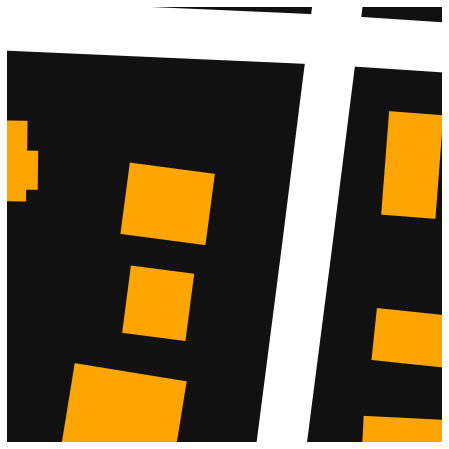

finito


In [28]:
place='00-ss'
c_osm=5
create_square_from_osm(outfile=place, c_osm=c_osm, point=point, dist=35, dpi=200, default_width=50)

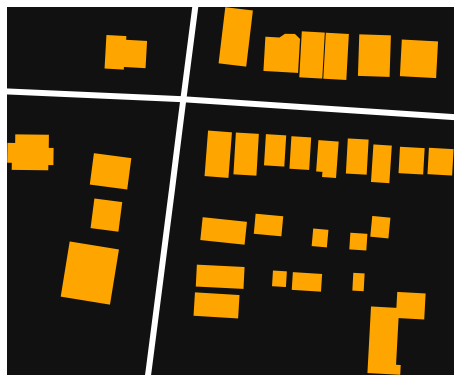

In [116]:
outfile='00-image'
c_osm = 5
create_map_from_osm(outfile=outfile, c_osm=c_osm, north=north, south=south, east=east, west=west)


In [188]:
place='00-gg'
make_plot_2(place, north=north,south=south,west=west,east=east, default_width=2,dpi=200, network_type='drive', street_widths={'primary':2})

/Users/dkarakay/opt/miniconda3/envs/gm-with-osm/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


fin
